# Chapter 3.1 - Solving Problems Using Qbit Expressions and Assignments

In this chapter we will be walking through how to use Qbit variables in more complex expressions and assignments to define real world problems and break them down into an expression and assignments that can be solved by a quantum computer or simulator.

First we are going to ensure that a default quantum solver is active.

In [1]:
from dann5.dwave import Solver
print(Solver.Active())

## Solving "Friends and Enemies" Problem

We are going to see how we can generate a Qbit expression/assignment to solve The problem called "Friends and Enemies": 

Given a set of people and information about some pairs of people that are friends and some pairs that are enemies….

How do we write a program that finds a solution in which all the friend and enemy relationships are correctly grouped?

If we are to use Qbit, we can identify 2 tribes, the 0 tribe and the 1 tribe. Everyone within the tribe is a friend, while the 0 tribe members are always enemies with the members of the tribe 1. This is an example of a valid solution for this problem:

> X (Xavier): 0
>
> Y (Yolanda): 0
>
> Z (Zeke): 1
>
> W (Wanda): 1

We can say that: 
> X and Y, or W and Z are friends as they have same qbit values.
>
> Y and Z (or any other combination) are enemies as they have different qubit values.

**Can we describe a problem using quantum bitwise logic to find all he possible solution?**


To start we need to define all of the tribes' members. That we do by setting the *Qbit* variables: *w, x, y* and *z* in superposition state.

In [2]:
from dann5.d5 import Qbit

x = Qbit("xaviar")
y = Qbit("yolanda")
z = Qbit("zeke")
w = Qbit("wanda")
_1 = Qbit("_1", 1)

print(w)
print(x)
print(y)
print(z)

wanda\S\
xaviar\S\
yolanda\S\
zeke\S\


The key pieces of information to create an expression for any scenario are the following:

> 1) That XOR: "**^**" is same as an **"unlike"** function, so if you want two variables to be enemies use this. 
>
> 2) That NXOR: ~(var1 ^ var2) or var1.nxor(var2) is same as a **"like"** function. So, if you want two variables to be friends use this.
>
> 3) When we solve only an expression the solution will include all possible options. So, it will include solutions where all the relationships are not correct, i.e. the expression results to *0* (which can be thought of as incorrect).
>
> 4) So, by assigning all the possible solutions to *1* we will get all the possibilities where the relationships are correct. 

With the following four rules in mind, we can now write out the above relationships as a following assignment:

In [3]:
fEAssignment = _1.assign(x.alike(y) & y.unlike(z) & z.alike(w));

# Same as:
# _1.assign(x.nxor(y) & ((y ^ z) & z.nxor(w)))
# _1._(~(x ^ y) & ((y ^ z) & ~(z ^ w)))

print(fEAssignment)
print()
print(fEAssignment.toString(True).replace(";", ";\n"))

_1\1\ = (((xaviar\S\ !^ yolanda\S\) & (yolanda\S\ ^ zeke\S\)) & (zeke\S\ !^ wanda\S\))

_1\1\ = _&0\S\ & _!^1\S\;
 _&0\S\ = _!^0\S\ & _^0\S\;
 _!^0\S\ = xaviar\S\ !^ yolanda\S\;
 _^0\S\ = yolanda\S\ ^ zeke\S\;
 _!^1\S\ = zeke\S\ !^ wanda\S\;
 


**Note**: If we used *_1. _ (~(x ^ y) & ((y ^ z) & ~(z ^ w)))* assignment, in its d5vc we would see an invert rule declared. As in tildeXpr and tildeAssign examples, in chapter 2.1. This would mean that the element on the left side of the ~ operator has to have inverted values of the variable on the right side of the tilde operator.

**Note**: The above expression is most optimal, we can add OR operator to list all possible scenarios where *x* and *y* are enemies to *z* and *w*, but that will create longer d5vc with more quantum logical nodes due to an increased number of auto-generated quantum auxiliary variables. The d5vc of such quantum assignment will run longer on a simulator or it will require a larger number of physical quantum-bits when executed on a quantum computer, without changing the end result.

So, we can write any expression with these 4 people where some are friends and some are enemies. And the quantum computing simulator will come up with all the possibilities where all of the relationships are true.

### Qbinder and use of quantum *compute()* method 

Now to solve the assignment we have defined above we will use a slightly different approach.

We will import the Qbinder class and use it to display the solutions of the assignment defined above.

We will start by defining a quantum binder variable and adding the Qbit variables into it usign the "**<<**" symbol (stream operator):

> Qbinder_var_name = Qbinder() << var1 << var2 << var3 ... 

We will then use the ***compute()*** function instead of solve to get the solutions (in this case in format of quantum evaluations). As in case of *solve()* method the *compute()* function returns a list of possible solutions that we can iterate over and print out:

In [4]:
from dann5.d5 import Qbinder

qbinder = Qbinder() << x << y << z << w

evaluations = fEAssignment.compute()
for evaluation in evaluations:
    print('{}\n'.format(evaluation))

#[_!^0]: 1; #[_!^1]: 0; #[_^0]: 0; _!^0: 1; _!^1: 1; _&0: 1; _^0: 1; wanda: 0; xaviar: 1; yolanda: 1; zeke: 0; 

#[_!^0]: 0; #[_!^1]: 1; #[_^0]: 0; _!^0: 1; _!^1: 1; _&0: 1; _^0: 1; wanda: 1; xaviar: 0; yolanda: 0; zeke: 1; 



Finally to see only the relevant variables that we have defined with their solution values, we will add the list of solutions (quantum evaluations variable) to the qbinder variable and print it. 

In [5]:
qbinder.add(evaluations);
print(qbinder)

xaviar\S\ yolanda\S\ zeke\S\ wanda\S\ {
xaviar\1\ yolanda\1\ zeke\0\ wanda\0\ 
xaviar\0\ yolanda\0\ zeke\1\ wanda\1\ 
}


We see there are two possible solutions to the constraints we have imposed through quantum program  that describes the original friends and enemies problem. 

To refresh here the conditions were: 

X & Y and W & Z: Friends

Y & Z: Enemies

And we know that anyone belonging to tribe 0 cannot be friends with anyone from tribe 1. And all members of a tribe are friends. So we see that in the two solutions, both conditions are satisfied. Taking the first as an example:

> xaviar\0\ yolanda\0\ zeke\1\ wanda\1\ 

Xaviar and Yolanda are in Tribe 0 so they are friends. Wanda and Zeke are in tribe 1 so they are friends. And Yolanda and Zeke are in two different tribes so they are enemies.



## Solving vertices and edges problems

> **The prblem**: For a given geometric shape we need to identify the maximum number of vertices which are not connected with an edge.

Here we are going to explore how to use Qbit operators, operations, expressions, and assignments to find the solutions for the problem in case of different shapes.

### Two vertices with an edge problem

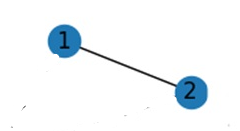

We will initialize in superposition state two Qbit variables representing vertex 1 and vertex 2 from the figure above.

In [6]:
v1 = Qbit("v1"); v2 = Qbit("v2"); vIdentified = Qbit("vI", 1)
print(v1, v2, vIdentified)

v1\S\ v2\S\ vI\1\


The edge between vertices v1 and 2 we will describe with a quantum operation *XOR (^)* to express the rule that only one of them at the time can have value *1*. 

In [7]:
assignment2 = vIdentified.assign(v1 ^ v2)

vertices = Qbinder() << v1 << v2

vertices.add(assignment2.compute())
print("Solutions for:", vertices)

Solutions for: v1\S\ v2\S\ {
v1\0\ v2\1\ 
v1\1\ v2\0\ 
}


### A triangle problem and triangular dependency constrain

from the triangle below we can conclude that only one vertex should be identified at any point of time.

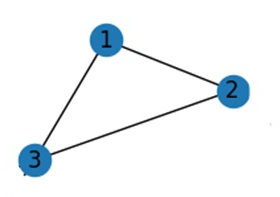

To solve problem we can logically state that:
> vertex 1 has to be different from antennas 2 and 3, or
>
> vertex 2 has to be different from antennas 1 and 3, or
>
> vertex 3 has to be different from antennas 1 and 2.

We are writing an *assignment3* stating the above conditions using *XOR (unlike)* when when have to have different values.

In [8]:
v3= Qbit("v3");
vertices.reset()
vertices = vertices << v3;

assignment3 = vIdentified.assign(((v1 ^ v2) & (v1 ^ v3)) | ((v2 ^ v1) & (v2 ^ v3)) | ((v3 ^ v1) & (v3 ^ v2)))
print(assignment3,"\n")
print(assignment3.toString(True), "\n")

evaluations = assignment3.compute()

vertices.add(evaluations)
print("Solutions for:", vertices)

vI\1\ = ((((v1\S\ ^ v2\S\) & (v1\S\ ^ v3\S\)) | ((v2\S\ ^ v1\S\) & (v2\S\ ^ v3\S\))) | ((v3\S\ ^ v1\S\) & (v3\S\ ^ v2\S\))) 

vI\1\ = _|0\S\ | _&4\S\; _|0\S\ = _&2\S\ | _&3\S\; _&2\S\ = _^2\S\ & _^3\S\; _^2\S\ = v1\S\ ^ v2\S\; _^3\S\ = v1\S\ ^ v3\S\; _&3\S\ = _^4\S\ & _^5\S\; _^4\S\ = v2\S\ ^ v1\S\; _^5\S\ = v2\S\ ^ v3\S\; _&4\S\ = _^6\S\ & _^7\S\; _^6\S\ = v3\S\ ^ v1\S\; _^7\S\ = v3\S\ ^ v2\S\;  

Solutions for: v1\S\ v2\S\ v3\S\ {
v1\0\ v2\0\ v3\1\ 
v1\0\ v2\1\ v3\0\ 
v1\1\ v2\0\ v3\0\ 
v1\0\ v2\1\ v3\1\ 
v1\1\ v2\0\ v3\1\ 
v1\1\ v2\1\ v3\0\ 
}


As we print and solve our initial quantum assignment for the three antennas problem, we see two problems:

1. The solutions are valid as we set the rules to ensure that one vertex is different than the other two. So, if we accept that regardless of the *assignment3* being correct (1) or incorrect (0), as long as one vertex is different than the other two, we have identified two sets of valid solutions:

    - one in which *1* means a vertex is identified:
        > v1\0\ v2\0\ v3\1\ 
        >
        > v1\0\ v2\1\ v3\0\ 
        >
        > v1\1\ v2\0\ v3\0\ 

    - and, the other in which *0* means the vertex is identified:
        > v1\0\ v2\1\ v3\1\ 
        >
        > v1\1\ v2\0\ v3\1\ 
        >
        > v1\1\ v2\1\ v3\0\ 


2. The quantum assignment describing our initial rules is quite long, with a large number of d5vc sub-assignments, which is resulting in a complex quantum code with many logical nodes, due to auto-generated auxiliary quantum variables. 

To further improve our solution, we should try to simplify the assignment before we focus on eliminating solutions in which value *0* means the vertex is identified.

We can use logical operations transformations to simplify the *assignment3* to a form that is shown in the following code example. We will see that the solutions have stayed the same.

In [9]:
vertices.reset()

assignment3 = vIdentified.assign((v1 ^ v2) | (v1 ^ v3) | (v2 ^ v3))
print(assignment3,"\n")
print(assignment3.toString(True), "\n")

vertices.add(assignment3.compute())
print("Solutions for ", vertices)

vI\1\ = (((v1\S\ ^ v2\S\) | (v1\S\ ^ v3\S\)) | (v2\S\ ^ v3\S\)) 

vI\1\ = _|2\S\ | _^10\S\; _|2\S\ = _^8\S\ | _^9\S\; _^8\S\ = v1\S\ ^ v2\S\; _^9\S\ = v1\S\ ^ v3\S\; _^10\S\ = v2\S\ ^ v3\S\;  

Solutions for  v1\S\ v2\S\ v3\S\ {
v1\1\ v2\0\ v3\0\ 
v1\0\ v2\0\ v3\1\ 
v1\0\ v2\1\ v3\0\ 
v1\1\ v2\0\ v3\1\ 
v1\0\ v2\1\ v3\1\ 
v1\1\ v2\1\ v3\0\ 
}


It is possible to further optimize the *assignment3*, because in the case of the close figure, such is a triangle, we can omit one of the edges and still get the same solutions. As it is shown in the following code example, we have simplified the assignment and its d5vc footprint, while preserving the same set of the solutions.

In [10]:
vertices.reset()

assignment3 = vIdentified.assign((v1 ^ v2) | (v1 ^ v3))
print(assignment3,"\n")
print(assignment3.toString(True), "\n")

vertices.add(assignment3.compute())
print("Solutions for ", vertices)

vI\1\ = ((v1\S\ ^ v2\S\) | (v1\S\ ^ v3\S\)) 

vI\1\ = _^11\S\ | _^12\S\; _^11\S\ = v1\S\ ^ v2\S\; _^12\S\ = v1\S\ ^ v3\S\;  

Solutions for  v1\S\ v2\S\ v3\S\ {
v1\0\ v2\0\ v3\1\ 
v1\0\ v2\1\ v3\0\ 
v1\0\ v2\1\ v3\1\ 
v1\1\ v2\0\ v3\0\ 
v1\1\ v2\0\ v3\1\ 
v1\1\ v2\1\ v3\0\ 
}


To eliminate a scenario when *0* value means a vertex is identified, we need to add a constraint to the assignment. We can observe that we would like to keep the solutions when only one antenna is *1*, which we can describe with triangular dependency expression that always is correct (*1*):

> v1.alike(v2).alike(v3)

- if vertex 1 is *1*, 
    
    - v1.alike(v2) can be *0* when vertex 2 is *0*
          
        - so vertex 3 has to be *0* as it is alike *0* (v1.alike(v2))
         
    - if v1.alike(v2) is *1*, it would mean vertex 2 has to be *1*
        
        - which would mean vertex 3 has to be *1* as well, but such a combination is impossible due to the rule 
             
            > (v1 ^ v2) | (v1 ^ v3)
       
You can test other scenarios in which vertex 1 is *0*, and you will find out that one of the other two vertices than will have to be *1*.

- **Note**: If for some reason, we would like *0* to be a correct state we can use a modified triangular dependency constrain
> v1.unlike(v2).alike(v3)

In [11]:
vertices.reset()

assignment3 = vIdentified.assign(((v1 ^ v2) | (v1 ^ v3)) & (v1.alike(v2).alike(v3)))

vertices.add(assignment3.compute())
print("Solutions for:", vertices)

Solutions for: v1\S\ v2\S\ v3\S\ {
v1\0\ v2\1\ v3\0\ 
v1\1\ v2\0\ v3\0\ 
v1\0\ v2\0\ v3\1\ 
}


### A rectangle problem

First, we will add the 4th vertex to the *vertices* quantum bundle to optimize presentation of calculated solutions.

In [12]:
v4 = Qbit("v4")
vertices.reset()
vertices = vertices << v4
print(vertices)

v1\S\ v2\S\ v3\S\ v4\S\ 


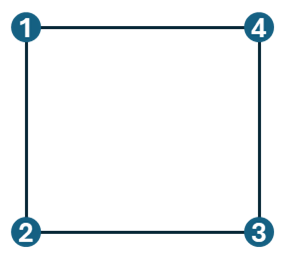

When four vertices are organized as a closed rectangle, like it is presented above, we can find the optimal solutions by stating that that neighboring vertices have to be different, as in the code below:

In [13]:
rectangleAssignment = vIdentified.assign((v1 ^ v2) & (v2 ^ v3) & (v3 ^ v4))

vertices.add(rectangleAssignment.compute())
print("Solutions for ", vertices)

Solutions for  v1\S\ v2\S\ v3\S\ v4\S\ {
v1\0\ v2\1\ v3\0\ v4\1\ 
v1\1\ v2\0\ v3\1\ v4\0\ 
}


### A pentagon problem

First, we will add the 5th vertex to the *vertices* quantum bundle to optimize presentation of calculated solutions.

In [14]:
v5 = Qbit("v5")
vertices.reset()
vertices = vertices << v5
print(vertices)

v1\S\ v2\S\ v3\S\ v4\S\ v5\S\ 


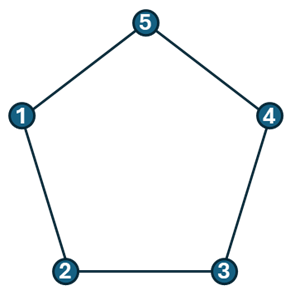

Let first look at a problem where vertices form a pentagon as depicted in the figure above. We can easily describe the problem using *NOT-EQUAL (!=)* quantum condition operators combined with *AND (&)* quantum logical operation as it is represented with the quantum expression *pentagonXpr* in the code example below.

Within 10 quantum evaluations of this problem, we see two sets of solutions:
- one where value *1* represents identified vertices, solution lines:
    > 1. vertex 3 and 5 are identified
    >
    > 2. vertex 2 and 5 are identified
    >
    > 3. vertex 2 and 4 are identified
    >
    > 6. vertex 1 and 4 are identified
    >
    > 7. vertex 1 and 3 are identified
    
- and the other where value *0* represents identified vertices, lines:
    
    > 4. vertex 1 and 3 are identified
    >
    > 5. vertex 1 and 4 are identified
    >
    > 8. vertex 2 and 4 are identified
    >
    > 9. vertex 2 and 5 are identified
    >
    > 10. vertex 3 and 5 are identified
    
- ***A CHALENGE***: Can we somehow define a simple constrain to single out just one set without significantly increasing the complexity of d5vc?

In [15]:
pentagonXpr = (v1 != v2) & (v2 != v3) & (v3 != v4) & (v4 != v5) & (v5 != v1)
print(pentagonXpr, "\n")
print(pentagonXpr.toString(True).replace(";", ";\n"))

vertices.add(pentagonXpr.compute())
print("Solutions for:", vertices)

(((((v1\S\ != v2\S\) & (v2\S\ != v3\S\)) & (v3\S\ != v4\S\)) & (v4\S\ != v5\S\)) & (v5\S\ != v1\S\)) 

_&11\S\ = _&10\S\ & v5\S\;
 _&10\S\ = _&9\S\ & v4\S\;
 _&9\S\ = _&8\S\ & v3\S\;
 _&8\S\ = v1\S\ & v2\S\;
 v1\S\ != v2\S\;
 v2\S\ != v3\S\;
 v3\S\ != v4\S\;
 v4\S\ != v5\S\;
 v5\S\ != v1\S\;
 
Solutions for: v1\S\ v2\S\ v3\S\ v4\S\ v5\S\ {
v1\0\ v2\0\ v3\1\ v4\0\ v5\1\ 
v1\0\ v2\1\ v3\0\ v4\0\ v5\1\ 
v1\0\ v2\1\ v3\0\ v4\1\ v5\0\ 
v1\0\ v2\1\ v3\0\ v4\1\ v5\1\ 
v1\0\ v2\1\ v3\1\ v4\0\ v5\1\ 
v1\1\ v2\0\ v3\0\ v4\1\ v5\0\ 
v1\1\ v2\0\ v3\1\ v4\0\ v5\0\ 
v1\1\ v2\0\ v3\1\ v4\0\ v5\1\ 
v1\1\ v2\0\ v3\1\ v4\1\ v5\0\ 
v1\1\ v2\1\ v3\0\ v4\1\ v5\0\ 
}


### A house problem

The following interference pattern of vertices forms a figure like a house.

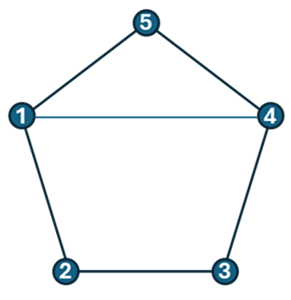

To solve a house shaped vertices identification problem, we can use previously explained triangle and rectangle quantum assignments and combine them into a quantum block of code called *houseBlock*. In the following example we can see the structure of *houseBlock* of quantum code with two quantum assignments.

In [16]:
roof = vIdentified.assign(((v1 ^ v4)| (v1 ^ v5)) & v1.alike(v4).alike(v5))
walls = vIdentified.assign(((v2 ^ v1) & (v2 ^ v3)) | ((v3 ^ v2) & (v3 ^ v4)))

from dann5.d5 import Qblock
houseBlock = Qblock() << walls << roof
print(houseBlock)

vertices.reset()
vertices.add(houseBlock.compute())
print("Solutions for:", vertices)

{
	vI\1\ = (((v2\S\ ^ v1\S\) & (v2\S\ ^ v3\S\)) | ((v3\S\ ^ v2\S\) & (v3\S\ ^ v4\S\)));
	vI\1\ = (((v1\S\ ^ v4\S\) | (v1\S\ ^ v5\S\)) & ((v1\S\ !^ v4\S\) !^ v5\S\));
}
Solutions for: v1\S\ v2\S\ v3\S\ v4\S\ v5\S\ {
v1\0\ v2\1\ v3\0\ v4\1\ v5\0\ 
v1\1\ v2\0\ v3\1\ v4\0\ v5\0\ 
v1\0\ v2\0\ v3\1\ v4\0\ v5\1\ 
v1\0\ v2\1\ v3\0\ v4\0\ v5\1\ 
}


### A hexagon problem

First, we will add the 6th vertex to the *vertices* quantum bundle to optimize presentation of calculated solutions.

In [17]:
v6 = Qbit("v6");
vertices.reset()
vertices = vertices << v6
print(vertices)

v1\S\ v2\S\ v3\S\ v4\S\ v5\S\ v6\S\ 


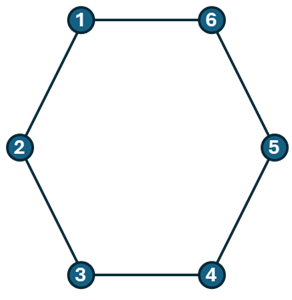

Based on 2 and 4 vertices problems we can assume that any problem of a closed shape with an even number of vertices that neighboring vertices have to be different. This principle can be describe using the following expression:

$$
 expression = \&_{i = 1}^{2n - 1}\ (ant_{i} != ant_{i + 1})\ \& \ (ant_{2n} != ant_{1})
$$

For six vertices organized as a closed hexagon, like presented the figure above, the described generic expression is presented with the following code:

In [18]:
verticesList = [Qbit("v{}".format(count + 1)) for count in range(0, 6)]
print(verticesList, "\n")

hexagonXpr = verticesList[5] != verticesList[0]
for count in range(0, 5):
    hexagonXpr = (hexagonXpr & (verticesList[count] != verticesList[count + 1]))
print(hexagonXpr, "\n")

vertices.reset()
vertices.add(hexagonXpr.compute())
print("Solutions for:", vertices)

[v1\S\, v2\S\, v3\S\, v4\S\, v5\S\, v6\S\] 

((((((v6\S\ != v1\S\) & (v1\S\ != v2\S\)) & (v2\S\ != v3\S\)) & (v3\S\ != v4\S\)) & (v4\S\ != v5\S\)) & (v5\S\ != v6\S\)) 

Solutions for: v1\S\ v2\S\ v3\S\ v4\S\ v5\S\ v6\S\ {
v1\0\ v2\1\ v3\0\ v4\1\ v5\0\ v6\1\ 
v1\1\ v2\0\ v3\1\ v4\0\ v5\1\ v6\0\ 
}
